In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
con = sqlite3.connect(r'C:\Users\UCHIHA\Desktop\quiz4\steam_dbb.sqlite')

cur = con.cursor()

cur.execute('''
    CREATE TABLE new_table AS
    SELECT name, price, genre, positive, negative FROM my_table
''')
cur.execute('DROP TABLE my_table')
cur.execute('ALTER TABLE new_table RENAME TO my_table') #რჩება მხოლოდ სასურველი სვეტები ბაზიდან

#####
amount = int(input("Enter amount(in cents): "))
genr = str(input("enter genre (Action, RPG, Strategy or Indie): ")) ##u can choose multiple | შეგვყავს სასურველი თანხა და ჟანრი
free = "DELETE FROM my_table WHERE price = 0" #შლის უფასო თამაშებს
cur.execute(free)

res = cur.execute("SELECT * FROM my_table WHERE price < ? AND genre = ? ORDER BY RANDOM()", (amount, genr,)).fetchmany(17)
if not res:
    print(f"No games found under {amount} cents in genre '{genr}'")
    exit()  #მონაცემთა ბაზიდან ირჩევს რენდომ 17თამაშს ჩვენ მიერ შეყვანილი თანხისა და ჟანრის ფარგლებში


def genre_count(genre):
    return cur.execute('SELECT count(*) FROM my_table WHERE genre=?', (genre,)).fetchone()[0]

def percentage(sum, part):
    return (part*100)/sum

a = genre_count('Action')
r = genre_count('RPG')
s = genre_count('Strategy')
i = genre_count('Indie')
all_games = a + r + s + i
pa = percentage(all_games, a)
pr = percentage(all_games, r)
ps = percentage(all_games, s)
pi = percentage(all_games, i) #თვლის თითოეული ჟანრის პროცენტობას

# print(pa, pr, ps, pi)


game_names = [game[0] for game in res]

prices = [int(game[1]) for game in res]
review_counts = {
    'Positive': np.array([int(game[3]) for game in res]),
    'Negative': np.array([int(game[4]) for game in res])
}

Enter amount(in cents):  1200
enter genre (Action, RPG, Strategy or Indie):  Action


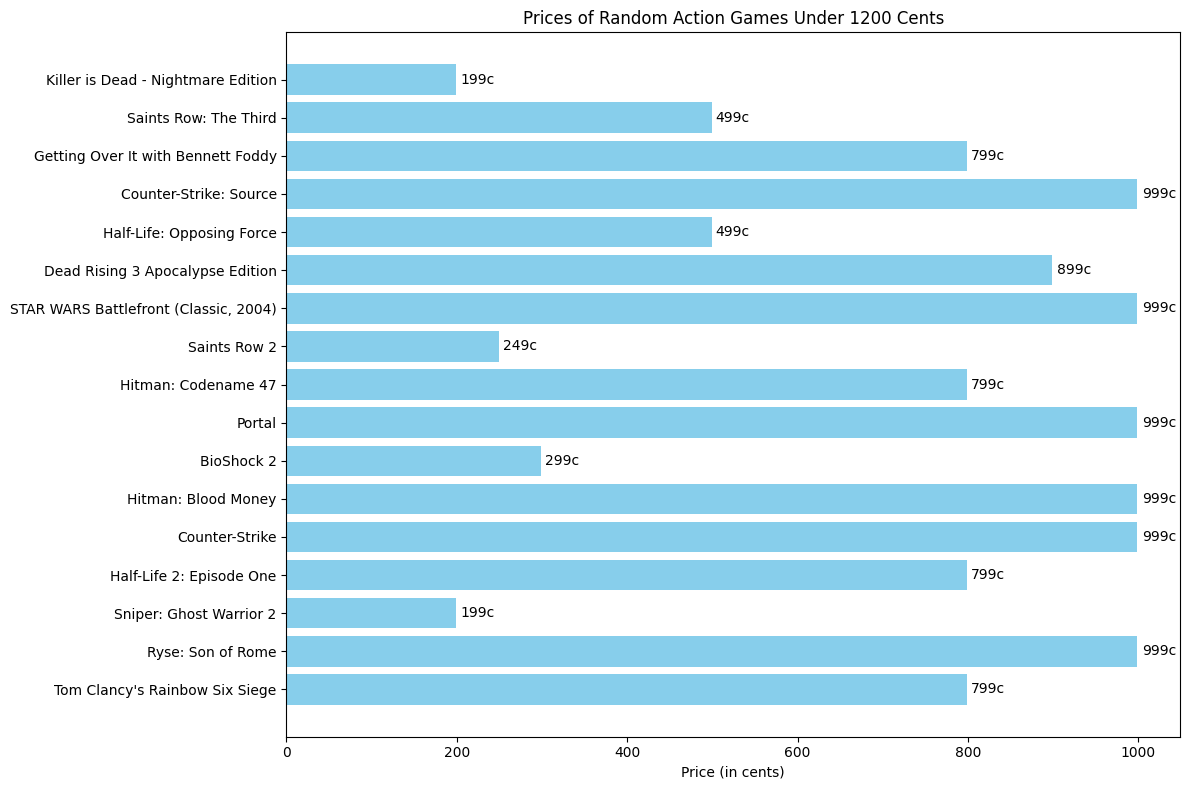

In [3]:
####graoh1 prices
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(game_names))


ax.barh(y_pos, prices, align='center', color='skyblue')
ax.set_yticks(y_pos, labels=game_names)
ax.invert_yaxis()
ax.set_xlabel('Price (in cents)')
ax.set_title(f'Prices of Random {genr} Games Under {amount} Cents')

for i, price in enumerate(prices):
    ax.text(price + 5, i, f'{price}c', va='center')

plt.tight_layout()
plt.show()  #აჩვენებს ჩვენ მიერ შეყვანილი მონაცემების შესაბამის თამაშებს სვეტური დიაგრამით

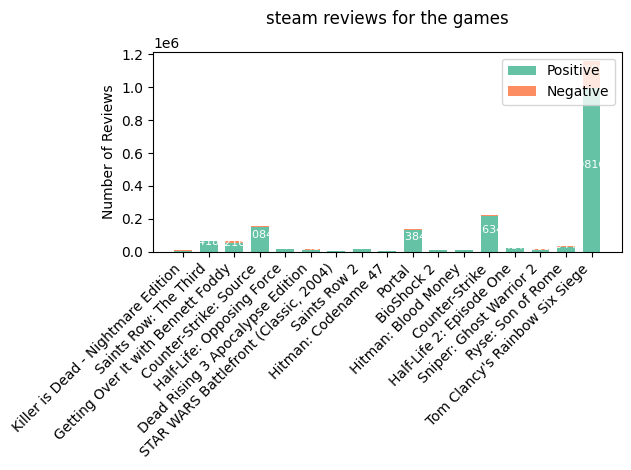

In [4]:
#####graph2  reviews
fig, ax = plt.subplots()
bottom = np.zeros(len(game_names))
width = 0.7
colors = {'Positive': '#66c2a5', 'Negative': '#fc8d62'}

for review_type, counts in review_counts.items():
    p = ax.bar(game_names, counts, width,
               label=review_type,
               color=colors[review_type],
               bottom=bottom)
    bottom += counts

    ax.bar_label(p, label_type='center', fmt='%d',
                 padding=3, color='white', fontsize=8)

ax.set_title(f'steam reviews for the games', pad=20)
ax.set_ylabel('Number of Reviews')
ax.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()

plt.show()  #განიხილავს იმავე თამაშების დადებით და უარყოფით შეფასებებს steamდან

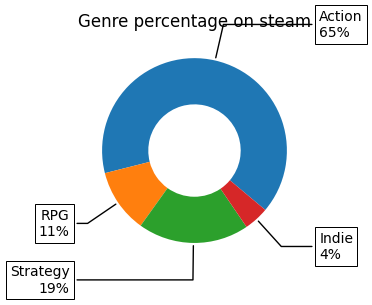

In [5]:
#3 donut chart for all games genres percentage on steam
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Action\n65%",
          "RPG\n11%",
          "Strategy\n19%",
          "Indie\n4%",]

data = [pa, pr, ps, pi]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Genre percentage on steam")

plt.show()  #აჩვენებს ყოველი Action, RPG, Strategy და indie თამაშის პროცენტულ რაოდენობას პლათფორმაზე

In [6]:
con.close()